## Analysis of Air quality sensors in Red Hook

In [1]:
#importing all the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data preparation

In [2]:
red_hook = pd.read_csv('Data/LuxDustNoise_summarized_4hour_0719.csv')

**Location:**

**sensor_0 :** RHI roof (at corner of Hicks and W 9th streets, elevation approx. 8m) - 767 Hicks St, Brooklyn, NY 11231

**sensor_3 :** RHI entrance (on Hicks street at street level) - 767 Hicks St, Brooklyn, NY 11231

**sensor_2 :** TechLab (at ground level) - 106 Ferris St

**sensor_4 :** PioneerWorks roof (elevation approx. 15m) - 159 Pioneer St, Brooklyn, NY 11231

Units: for luminosity (in Lux), particulate concentration (particle count per 0.01 cubic feet), and noise (sound pressure level in dB)

In [3]:
red_hook.head()

,dt,sensor,lux,con,spl
0,2016-06-21 00:00:00,sensor_0,0.0,2834.03125,66.308479
1,2016-06-21 00:00:00,sensor_2,0.0,1691.99625,70.375943
2,2016-06-21 00:00:00,sensor_3,0.0,1686.44125,76.235738
3,2016-06-21 00:00:00,sensor_4,0.0,2324.65875,70.652334
4,2016-06-21 04:00:00,sensor_0,3213.5,2748.28875,81.467436


In [4]:
red_hook.drop('lux', axis=1, inplace = True)

In [5]:
red_hook.dt = pd.to_datetime(red_hook.dt)

In [6]:
red_hook['date'] = pd.to_datetime(red_hook.dt).apply( lambda x: x.date() )
red_hook['time'] = pd.to_datetime(red_hook.dt).apply( lambda x: x.time() )
red_hook.head(10)

,dt,sensor,con,spl,date,time
0,2016-06-21 00:00:00,sensor_0,2834.03125,66.308479,2016-06-21,00:00:00
1,2016-06-21 00:00:00,sensor_2,1691.99625,70.375943,2016-06-21,00:00:00
2,2016-06-21 00:00:00,sensor_3,1686.44125,76.235738,2016-06-21,00:00:00
3,2016-06-21 00:00:00,sensor_4,2324.65875,70.652334,2016-06-21,00:00:00
4,2016-06-21 04:00:00,sensor_0,2748.28875,81.467436,2016-06-21,04:00:00
5,2016-06-21 04:00:00,sensor_2,2550.94500,72.334450,2016-06-21,04:00:00
6,2016-06-21 04:00:00,sensor_3,2041.33000,79.445869,2016-06-21,04:00:00
7,2016-06-21 04:00:00,sensor_4,3041.73875,81.499422,2016-06-21,04:00:00
8,2016-06-21 08:00:00,sensor_0,2720.35125,80.020600,2016-06-21,08:00:00
9,2016-06-21 08:00:00,sensor_2,3088.82750,76.372047,2016-06-21,08:00:00


In [7]:
#separating the sensors
sensor0 = red_hook[red_hook.sensor=='sensor_0']
sensor2 = red_hook[red_hook.sensor=='sensor_2']
sensor3 = red_hook[red_hook.sensor=='sensor_3']
sensor4 = red_hook[red_hook.sensor=='sensor_4']

### Time Series Analysis

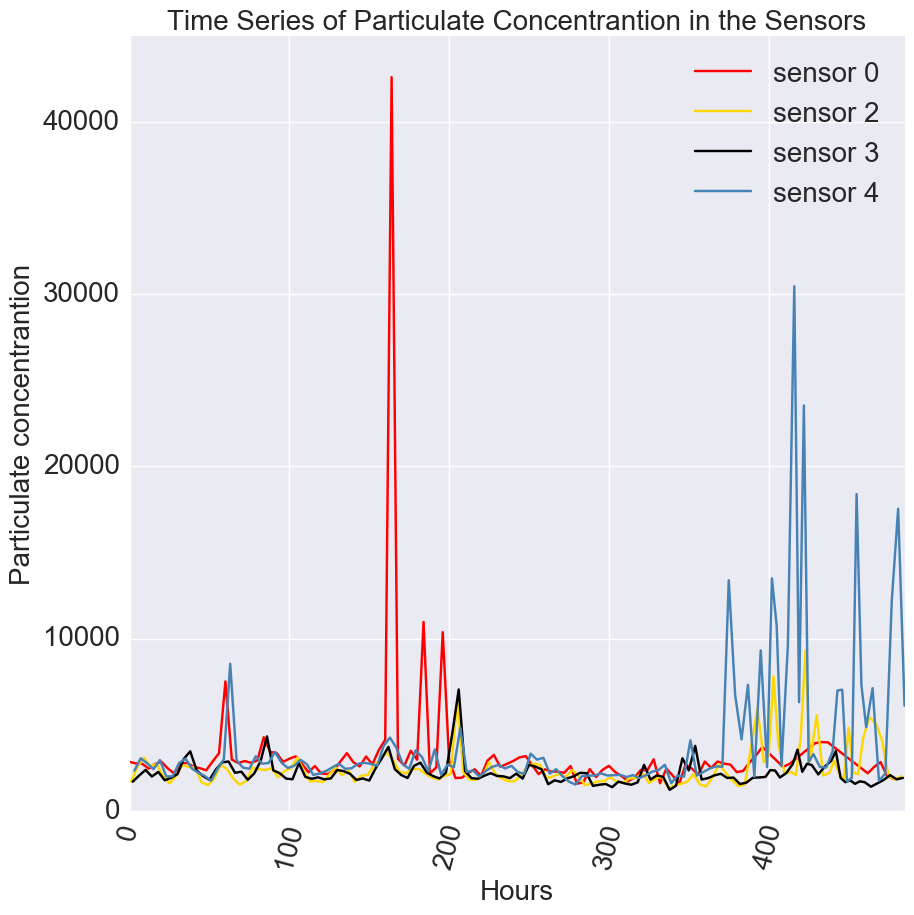

In [8]:
ax = sensor0.con.plot(figsize=(10,10), color="Red", label ='sensor 0')
ax = sensor2.con.plot(figsize=(10,10), color="Gold", label ='sensor 2')
ax = sensor3.con.plot(figsize=(10,10), color="Black", label ='sensor 3')
ax = sensor4.con.plot(figsize=(10,10), color="SteelBlue", label ='sensor 4')

plt.xticks(rotation=75, fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(-20, plt.ylim()[1])
plt.legend(loc ='best', fontsize=20)
plt.xlabel("Hours", fontsize=20)
plt.ylabel("Particulate concentrantion", fontsize=20)
plt.title('Time Series of Particulate Concentrantion in the Sensors', fontsize=20)
plt.show()

**Fig.1:** Time Series of Particulate Concentrantion (particle count per 0.01 cubic feet) by hour measured by sensors.It can be seen that sensor 0 and 2 has to clear spikes but in the majority of the time the concentration in the 4 sensors are pretty similar.

In [9]:
## Deparating every sensor to analyze independenly

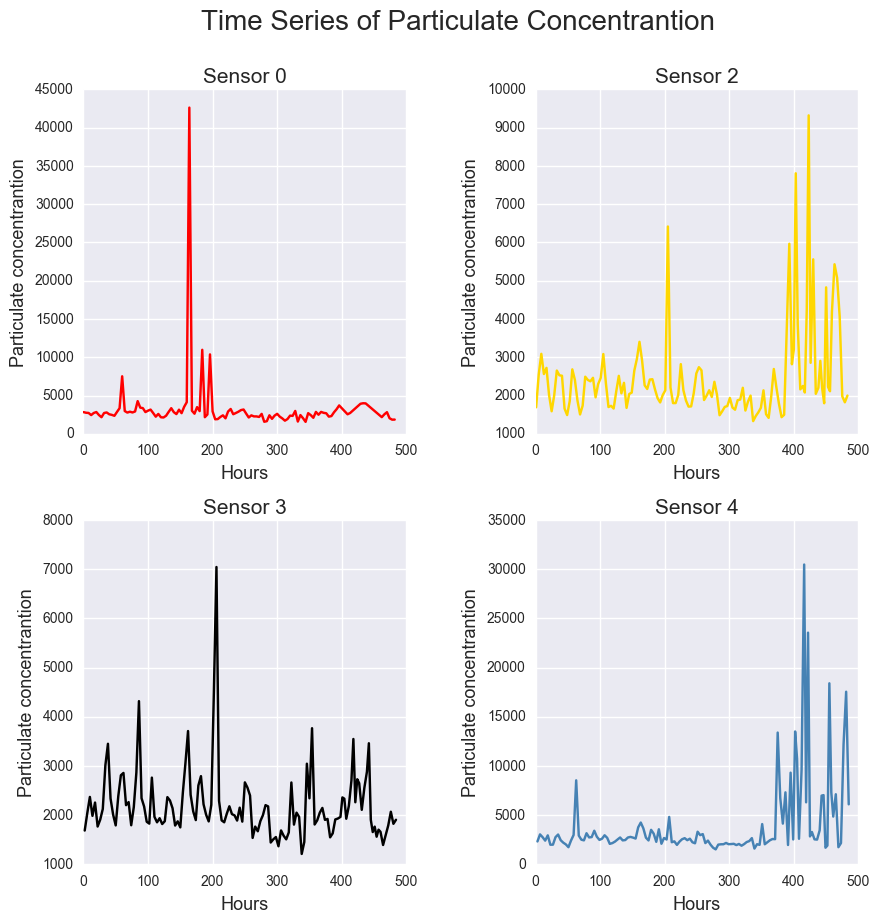

In [10]:
fs = 15

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))

ax = axes[0,0]
ax.plot(sensor0.con, color="Red", label ='sensor 0')
ax.set_xlabel("Hours", fontsize=fs-2)
ax.set_ylabel("Particulate concentrantion", fontsize=fs-2)
ax.set_title('Sensor 0', fontsize=fs)

ax = axes[0,1]
ax.plot(sensor2.con, color="Gold", label ='sensor 2')
ax.set_xlabel("Hours", fontsize=fs-2)
ax.set_ylabel("Particulate concentrantion", fontsize=fs-2)
ax.set_title('Sensor 2', fontsize=fs)


ax = axes[1,0]
ax.plot(sensor3.con, color="Black", label ='sensor 3')
ax.set_xlabel("Hours", fontsize=fs-2)
ax.set_ylabel("Particulate concentrantion", fontsize=fs-2)
ax.set_title('Sensor 3', fontsize=fs)

ax = axes[1,1]
ax.plot(sensor4.con, color="SteelBlue", label ='sensor 4')
ax.set_xlabel("Hours", fontsize=fs-2)
ax.set_ylabel("Particulate concentrantion", fontsize=fs-2)
ax.set_title('Sensor 4', fontsize=fs)


fig.suptitle('Time Series of Particulate Concentrantion', fontsize=fs+5)
fig.subplots_adjust(wspace = 0.4 , hspace = 0.25)

plt.show()

**Fig.2:** Time Series of Particulate Concentrantion (particle count per 0.01 cubic feet) by hour measured. Sensor sensor 0 located at RHI roof (at corner of Hicks and W 9th streets, elevation approx. 8m) - 767 Hicks St, Brooklyn, NY 11231. It can be seen that there is a spike that has to be detected later in the Detenction event. sensor 2 located at TechLab (at ground level) - 106 Ferris St. It can be seen that there are some spikes that catched the attention. Later the most relevant will be analysed. sensor 3 located at RHI entrance (on Hicks street at street level) - 767 Hicks St, Brooklyn, NY 11231. It can be seen a spike that catched the attention. Later the most relevant will be analysed. Sensor 4 located at PioneerWorks roof (elevation approx. 15m) - 159 Pioneer St, Brooklyn, NY 11231. It can be seen some spikes at the end of the data.

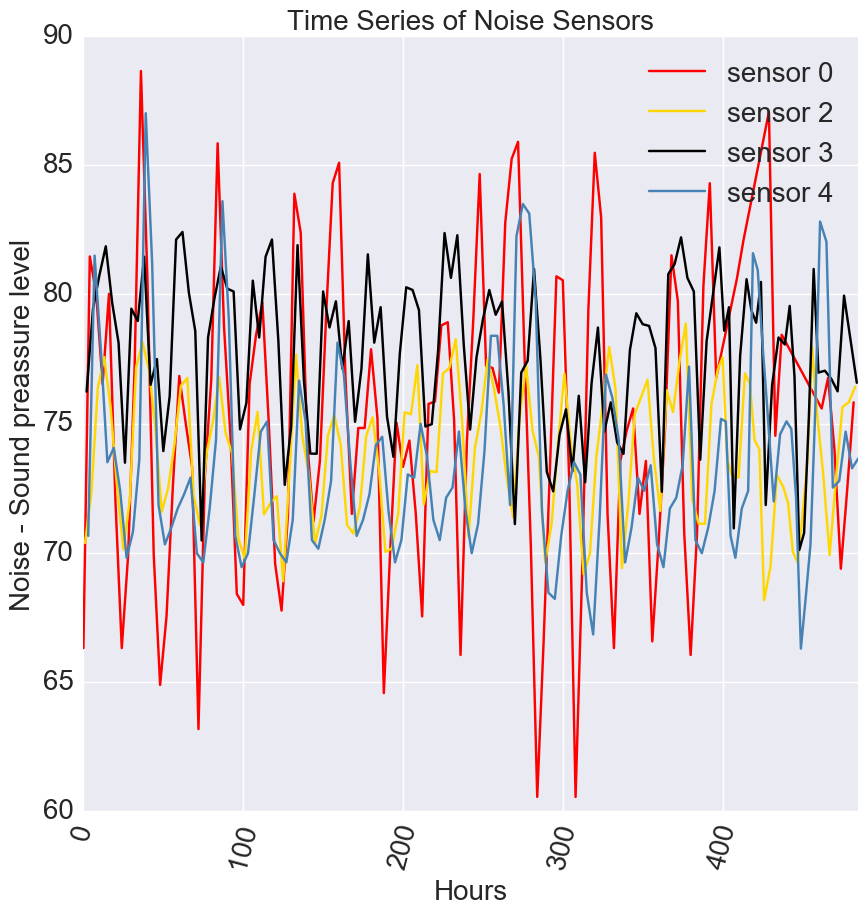

In [11]:
ax = sensor0.spl.plot(figsize=(10,10), color="Red", label ='sensor 0')
ax = sensor2.spl.plot(figsize=(10,10), color="Gold", label ='sensor 2')
ax = sensor3.spl.plot(figsize=(10,10), color="Black", label ='sensor 3')
ax = sensor4.spl.plot(figsize=(10,10), color="SteelBlue", label ='sensor 4')

plt.xticks(rotation=75, fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.xlabel("Hours", fontsize=20)
plt.ylabel("Noise - Sound preassure level", fontsize=20)
plt.title('Time Series of Noise Sensors', fontsize=20)

**Fig.3:** Time Series of noise (sound pressure level in dB) by hour measured by sensor. 

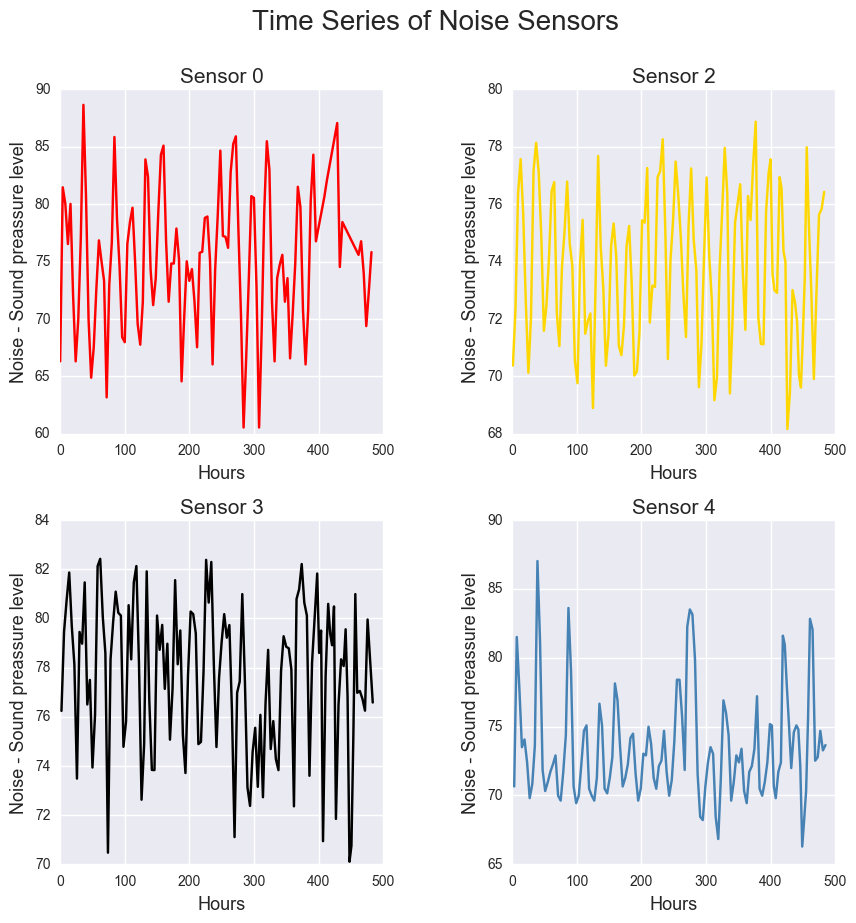

In [33]:
fs = 15

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))

ax = axes[0,0]
ax.plot(sensor0.spl, color="Red", label ='sensor 0')
ax.set_xlabel("Hours", fontsize=fs-2)
ax.set_ylabel("Noise - Sound preassure level", fontsize=fs-2)
ax.set_title('Sensor 0', fontsize=fs)

ax = axes[0,1]
ax.plot(sensor2.spl, color="Gold", label ='sensor 2')
ax.set_xlabel("Hours", fontsize=fs-2)
ax.set_ylabel("Noise - Sound preassure level", fontsize=fs-2)
ax.set_title('Sensor 2', fontsize=fs)


ax = axes[1,0]
ax.plot(sensor3.spl, color="Black", label ='sensor 3')
ax.set_xlabel("Hours", fontsize=fs-2)
ax.set_ylabel("Noise - Sound preassure level", fontsize=fs-2)
ax.set_title('Sensor 3', fontsize=fs)

ax = axes[1,1]
ax.plot(sensor4.spl, color="SteelBlue", label ='sensor 4')
ax.set_xlabel("Hours", fontsize=fs-2)
ax.set_ylabel("Noise - Sound preassure level", fontsize=fs-2)
ax.set_title('Sensor 4', fontsize=fs)


fig.suptitle('Time Series of Noise Sensors', fontsize=fs+5)
fig.subplots_adjust(wspace = 0.4 , hspace = 0.25)

plt.show()

**Fig. 4:** Time Series of noise (sound pressure level in dB) by hour measured by sensor 0 located at RHI roof (at corner of Hicks and W 9th streets, elevation approx. 8m) - 767 Hicks St, Brooklyn, NY 11231. It can be seen that time series is uniform. Sensor 2 located at TechLab (at ground level) - 106 Ferris St. It can be seen as very uniform. Sensor 3 located at RHI entrance (on Hicks street at street level) - 767 Hicks St, Brooklyn, NY 11231. It can be seen as very uniform. Sensor 4 located at PioneerWorks roof (elevation approx. 15m) - 159 Pioneer St, Brooklyn, NY 11231. It can be seen that as well it is uniform distributed.

In [34]:
#Histograms

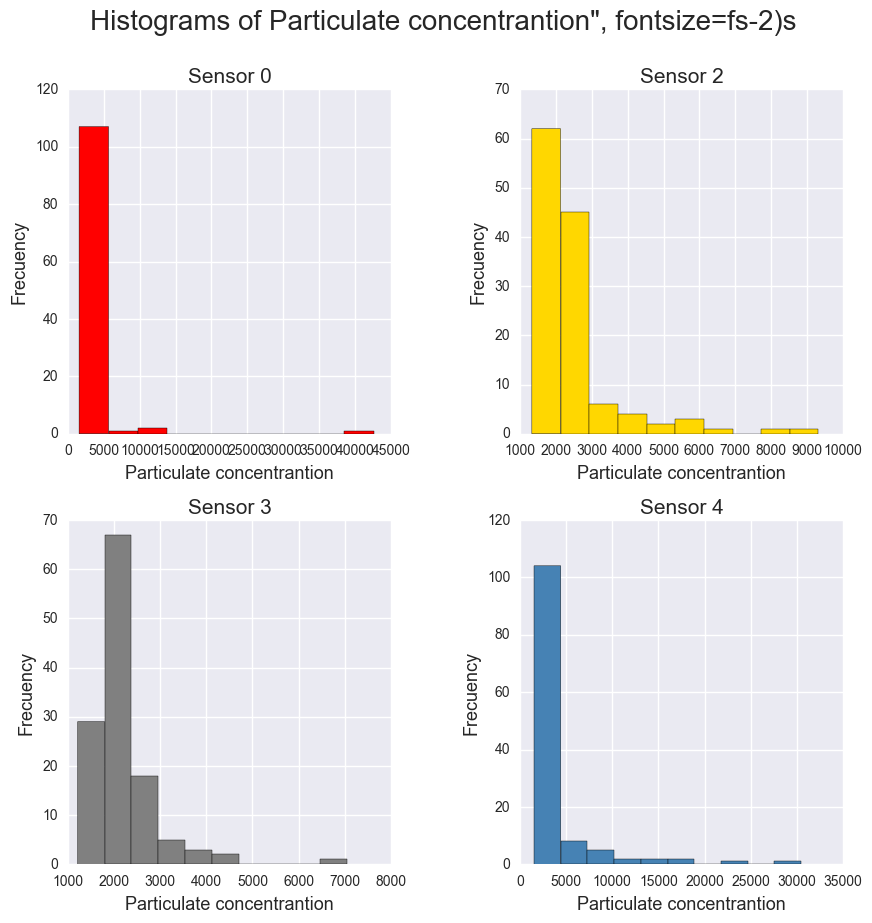

In [14]:
s = 15

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))

ax = axes[0,0]
ax.hist(sensor0.con, color="Red", label ='sensor 0')
ax.set_ylabel("Frecuency", fontsize=fs-2)
ax.set_xlabel("Particulate concentrantion", fontsize=fs-2)
ax.set_xticklabels?
ax.set_title('Sensor 0', fontsize=fs)

ax = axes[0,1]
ax.hist(sensor2.con, color="Gold", label ='sensor 2')
ax.set_ylabel("Frecuency", fontsize=fs-2)
ax.set_xlabel("Particulate concentrantion", fontsize=fs-2)
ax.set_title('Sensor 2', fontsize=fs)


ax = axes[1,0]
ax.hist(sensor3.con, color="Grey", label ='sensor 3')
ax.set_ylabel("Frecuency", fontsize=fs-2)
ax.set_xlabel("Particulate concentrantion", fontsize=fs-2)
ax.set_title('Sensor 3', fontsize=fs)

ax = axes[1,1]
ax.hist(sensor4.con, color="SteelBlue", label ='sensor 4')
ax.set_ylabel("Frecuency", fontsize=fs-2)
ax.set_xlabel("Particulate concentrantion", fontsize=fs-2)
ax.set_title('Sensor 4', fontsize=fs)


fig.suptitle('Histograms of Particulate concentrantion", fontsize=fs-2)s', fontsize=fs+5)
fig.subplots_adjust(wspace = 0.4 , hspace = 0.25)

plt.show()

**Fig.5:** Histogram on concetration level to see the distribution and the most relevant measurement.

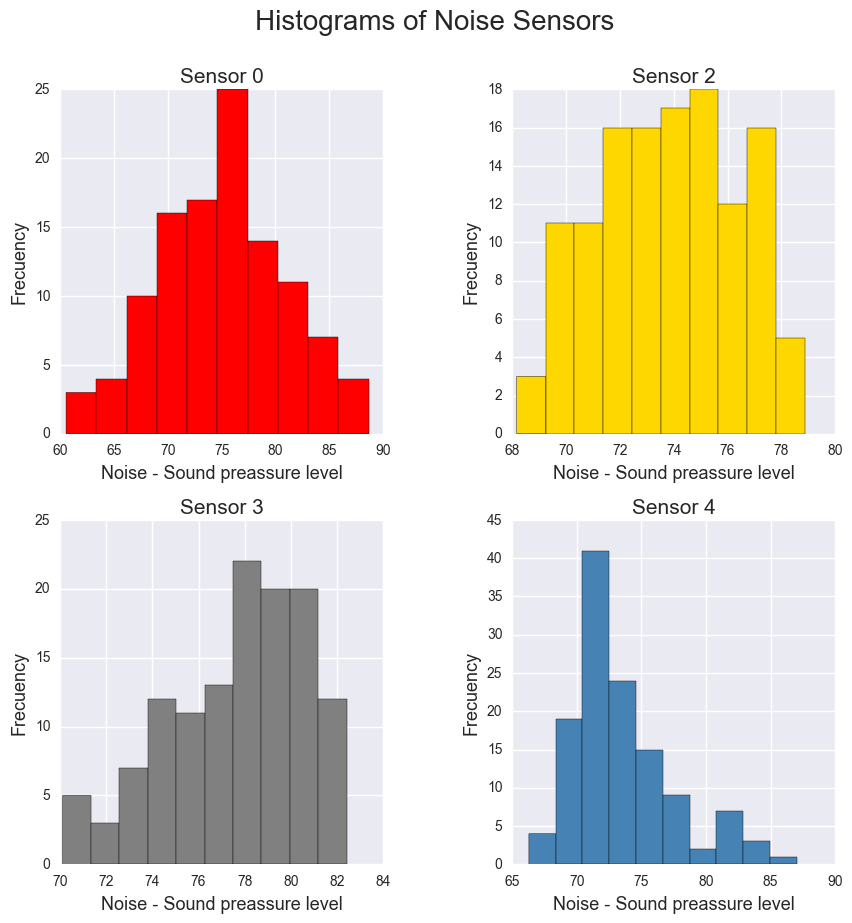

In [15]:
s = 15

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))

ax = axes[0,0]
ax.hist(sensor0.spl, color="Red", label ='sensor 0')
ax.set_ylabel("Frecuency", fontsize=fs-2)
ax.set_xlabel("Noise - Sound preassure level", fontsize=fs-2)
ax.set_title('Sensor 0', fontsize=fs)

ax = axes[0,1]
ax.hist(sensor2.spl, color="Gold", label ='sensor 2')
ax.set_ylabel("Frecuency", fontsize=fs-2)
ax.set_xlabel("Noise - Sound preassure level", fontsize=fs-2)
ax.set_title('Sensor 2', fontsize=fs)


ax = axes[1,0]
ax.hist(sensor3.spl, color="Grey", label ='sensor 3')
ax.set_ylabel("Frecuency", fontsize=fs-2)
ax.set_xlabel("Noise - Sound preassure level", fontsize=fs-2)
ax.set_title('Sensor 3', fontsize=fs)

ax = axes[1,1]
ax.hist(sensor4.spl, color="SteelBlue", label ='sensor 4')
ax.set_ylabel("Frecuency", fontsize=fs-2)
ax.set_xlabel("Noise - Sound preassure level", fontsize=fs-2)
ax.set_title('Sensor 4', fontsize=fs)


fig.suptitle('Histograms of Noise Sensors', fontsize=fs+5)
fig.subplots_adjust(wspace = 0.4 , hspace = 0.25)

plt.show()

### Event Detection

### Analysing the threesold

In [18]:
print ('sensor 0')
print ("mean con by hour {:.2f}".format(sensor0['con'].mean()))
print ("stdev con by hour {:.2f}".format(sensor0['con'].std()))
thresholds0 = [sensor0['con'].mean() + 3 * sensor0['con'].std(), 
              sensor0['con'].mean() - 3 * sensor0['con'].std()]
print ("3-sigma thresholds {:.2f} {:.2f}".format(*thresholds0))
print "earliest datapoint:", min(sensor0.date), min(sensor0.time)

print ('\nsensor 2')
print ("mean con by hour {:.2f}".format(sensor2['con'].mean()))
print ("stdev con by hour {:.2f}".format(sensor2['con'].std()))
thresholds2 = [sensor2['con'].mean() + 3 * sensor2['con'].std(), 
              sensor2['con'].mean() - 3 * sensor2['con'].std()]
print ("3-sigma thresholds {:.2f} {:.2f}".format(*thresholds2))
print "earliest datapoint:", min(sensor2.date), min(sensor2.time)

print ('\nsensor 3')
print ("mean con by hour {:.2f}".format(sensor3['con'].mean()))
print ("stdev con by hour {:.2f}".format(sensor3['con'].std()))
thresholds3 = [sensor3['con'].mean() + 3 * sensor3['con'].std(), 
              sensor3['con'].mean() - 3 * sensor3['con'].std()]
print ("3-sigma thresholds {:.2f} {:.2f}".format(*thresholds3))
print "earliest datapoint:", min(sensor3.date), min(sensor3.time)

print ('\nsensor 4')
print ("mean con by hour {:.2f}".format(sensor4['con'].mean()))
print ("stdev con by hour {:.2f}".format(sensor4['con'].std()))
thresholds4 = [sensor4['con'].mean() + 3 * sensor4['con'].std(), 
              sensor4['con'].mean() - 3 * sensor4['con'].std()]
print ("3-sigma thresholds {:.2f} {:.2f}".format(*thresholds4))
print "earliest datapoint:", min(sensor4.date), min(sensor4.time)

sensor 0
mean con by hour 3185.44
stdev con by hour 3988.03
3-sigma thresholds 15149.53 -8778.65
earliest datapoint: 2016-06-21 00:00:00

sensor 2
mean con by hour 2460.03
stdev con by hour 1209.59
3-sigma thresholds 6088.80 -1168.75
earliest datapoint: 2016-06-21 00:00:00

sensor 3
mean con by hour 2198.28
stdev con by hour 713.86
3-sigma thresholds 4339.85 56.71
earliest datapoint: 2016-06-21 00:00:00

sensor 4
mean con by hour 3949.71
stdev con by hour 4183.68
3-sigma thresholds 16500.76 -8601.34
earliest datapoint: 2016-06-21 00:00:00


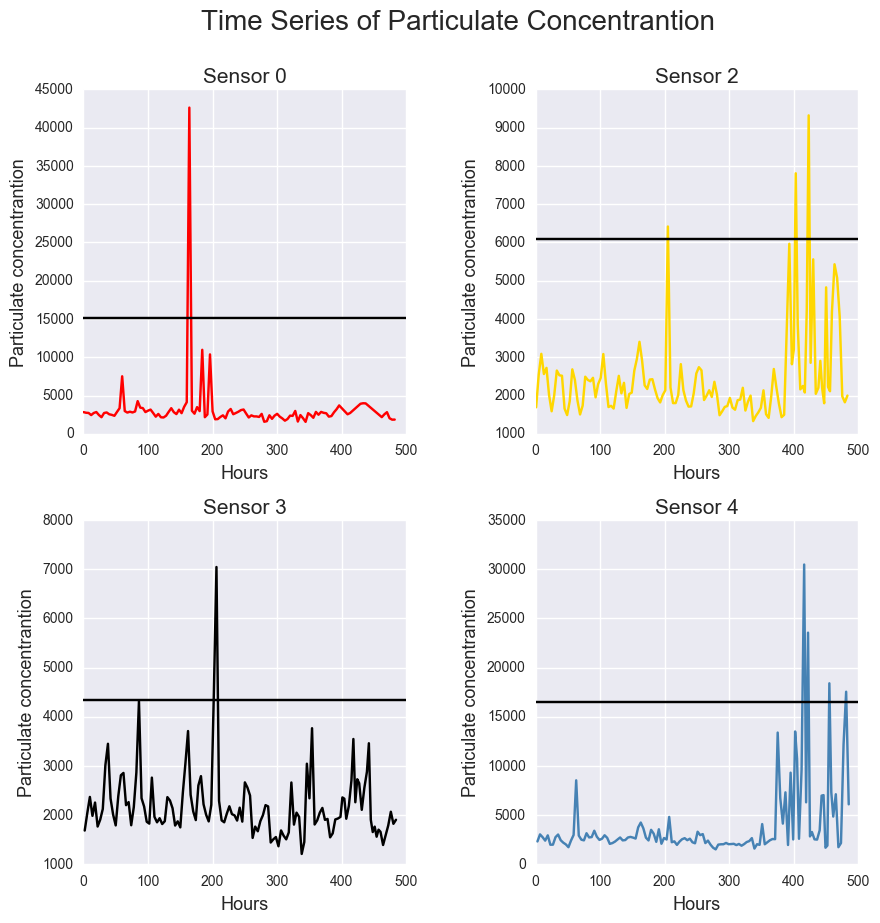

In [19]:
fs = 15

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))

ax = axes[0,0]
ax.plot(sensor0.con, color="Red", label ='sensor 0')

ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds0[0], thresholds0[0]], color='k')
ax.set_xlabel("Hours", fontsize=fs-2)
ax.set_ylabel("Particulate concentrantion", fontsize=fs-2)
ax.set_title('Sensor 0', fontsize=fs)

ax = axes[0,1]
ax.plot(sensor2.con, color="Gold", label ='sensor 2')
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds2[0], thresholds2[0]], color='k')
ax.set_xlabel("Hours", fontsize=fs-2)
ax.set_ylabel("Particulate concentrantion", fontsize=fs-2)
ax.set_title('Sensor 2', fontsize=fs)


ax = axes[1,0]
ax.plot(sensor3.con, color="Black", label ='sensor 3')
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds3[0], thresholds3[0]], color='k')
ax.set_xlabel("Hours", fontsize=fs-2)
ax.set_ylabel("Particulate concentrantion", fontsize=fs-2)
ax.set_title('Sensor 3', fontsize=fs)

ax = axes[1,1]
ax.plot(sensor4.con, color="SteelBlue", label ='sensor 4')
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds4[0], thresholds4[0]], color='k')
ax.set_xlabel("Hours", fontsize=fs-2)
ax.set_ylabel("Particulate concentrantion", fontsize=fs-2)
ax.set_title('Sensor 4', fontsize=fs)


fig.suptitle('Time Series of Particulate Concentrantion', fontsize=fs+5)
fig.subplots_adjust(wspace = 0.4 , hspace = 0.25)

plt.show()

In [20]:
print ('The event detected is: ')
print (sensor0[(sensor0.con > thresholds0[0])])
print ('\n')
print (sensor2[(sensor2.con > thresholds2[0])])
print ('\n')
print (sensor3[(sensor3.con > thresholds3[0])])
print ('\n')
print (sensor4[(sensor4.con > thresholds4[0])])

The event detected is: 
                     dt    sensor        con        spl        date      time
164 2016-06-27 20:00:00  sensor_0  42612.265  76.766054  2016-06-27  20:00:00


                     dt    sensor         con        spl        date      time
205 2016-06-29 12:00:00  sensor_2  6415.70250  75.356546  2016-06-29  12:00:00
403 2016-07-07 20:00:00  sensor_2  7805.96125  73.556487  2016-07-07  20:00:00
423 2016-07-08 20:00:00  sensor_2  9319.34625  73.997845  2016-07-08  20:00:00


                     dt    sensor         con        spl        date      time
202 2016-06-29 08:00:00  sensor_3  4500.10250  80.275216  2016-06-29  08:00:00
206 2016-06-29 12:00:00  sensor_3  7042.19375  80.170259  2016-06-29  12:00:00


                     dt    sensor         con        spl        date      time
416 2016-07-08 08:00:00  sensor_4  30462.6575  72.394911  2016-07-08  08:00:00
422 2016-07-08 16:00:00  sensor_4  23540.7300  80.936906  2016-07-08  16:00:00
455 2016-07-10 08:00:00 

In [21]:
thresholds0 = [sensor0['spl'].mean() + 3 * sensor0['spl'].std(), 
              sensor0['spl'].mean() - 3 * sensor0['spl'].std()]

thresholds2 = [sensor2['spl'].mean() + 3 * sensor2['spl'].std(), 
              sensor2['spl'].mean() - 3 * sensor2['spl'].std()]

thresholds3 = [sensor3['spl'].mean() + 3 * sensor3['spl'].std(), 
              sensor3['spl'].mean() - 3 * sensor3['spl'].std()]

thresholds4 = [sensor4['spl'].mean() + 3 * sensor4['spl'].std(), 
              sensor4['spl'].mean() - 3 * sensor4['spl'].std()]

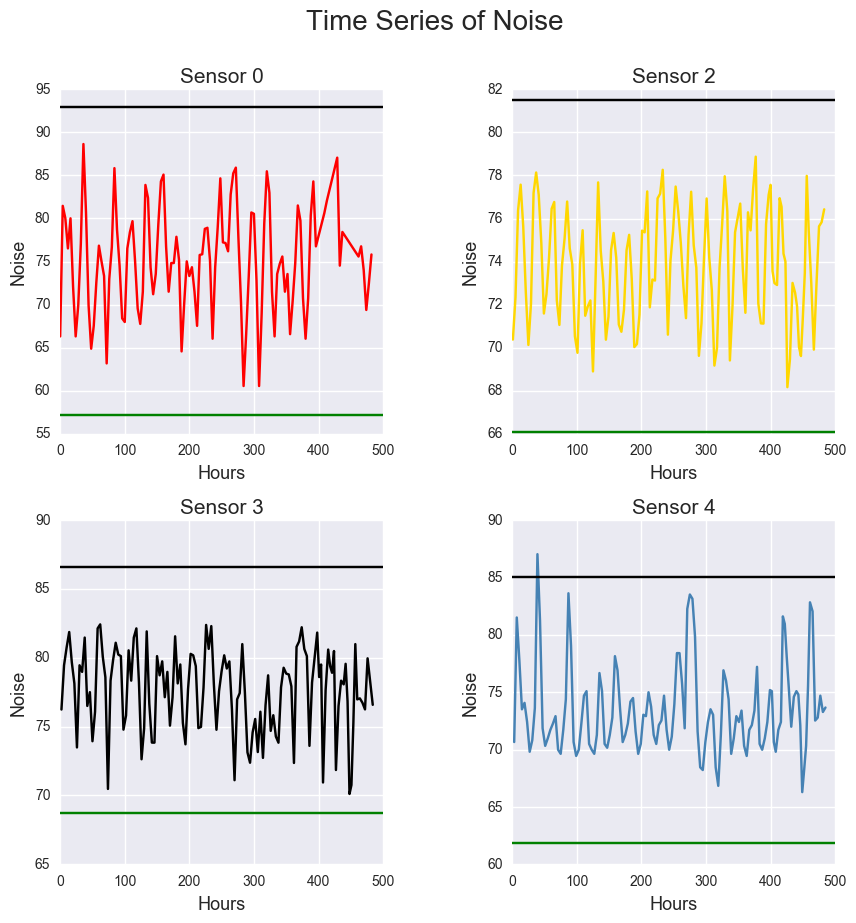

In [22]:
fs = 15

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))

ax = axes[0,0]
ax.plot(sensor0.spl, color="Red", label ='sensor 0')
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds0[0], thresholds0[0]], color='k', label = 'uppper thresold')
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds0[1], thresholds0[1]], color='green', label = 'lower thresold')

ax.set_xlabel("Hours", fontsize=fs-2)
ax.set_ylabel("Noise", fontsize=fs-2)
ax.set_title('Sensor 0', fontsize=fs)

ax = axes[0,1]
ax.plot(sensor2.spl, color="Gold", label ='sensor 2')
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds2[0], thresholds2[0]], color='k')
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds2[1], thresholds2[1]], color='green', label = 'lower thresold')

ax.set_xlabel("Hours", fontsize=fs-2)
ax.set_ylabel("Noise", fontsize=fs-2)
ax.set_title('Sensor 2', fontsize=fs)


ax = axes[1,0]
ax.plot(sensor3.spl, color="Black", label ='sensor 3')

ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds3[0], thresholds3[0]], color='k')
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds3[1], thresholds3[1]], color='green', label = 'lower thresold')

ax.set_xlabel("Hours", fontsize=fs-2)
ax.set_ylabel("Noise", fontsize=fs-2)
ax.set_title('Sensor 3', fontsize=fs)

ax = axes[1,1]
ax.plot(sensor4.spl, color="SteelBlue", label ='sensor 4')
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds4[0], thresholds4[0]], color='k')
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds4[1], thresholds4[1]], color='green', label = 'lower thresold')

ax.set_xlabel("Hours", fontsize=fs-2)
ax.set_ylabel("Noise", fontsize=fs-2)
ax.set_title('Sensor 4', fontsize=fs)


fig.suptitle('Time Series of Noise', fontsize=fs+5)
fig.subplots_adjust(wspace = 0.4 , hspace = 0.25)

plt.show()

In [23]:
print ('the detected event is:')

sensor4.loc[(sensor4.spl > thresholds4[0])]

the detected event is:


,dt,sensor,con,spl,date,time
39,2016-06-22 12:00:00,sensor_4,2453.33875,87.013511,2016-06-22,12:00:00


## by dates

In [24]:
# grouping by day

In [25]:
sensor_con_date0 = sensor0[['date', 'con']].groupby('date').sum()
sensor_spl_date0 = sensor0[['date', 'spl']].groupby('date').sum()

sensor_con_date2 = sensor2[['date', 'con']].groupby('date').sum()
sensor_spl_date2 = sensor2[['date', 'spl']].groupby('date').sum()

sensor_con_date3 = sensor3[['date', 'con']].groupby('date').sum()
sensor_spl_date3 = sensor3[['date', 'spl']].groupby('date').sum()

sensor_con_date4 = sensor4[['date', 'con']].groupby('date').sum()
sensor_spl_date4 = sensor4[['date', 'spl']].groupby('date').sum()

In [26]:
thresholds0 = [sensor_con_date0['con'].mean() + 3 * sensor_con_date0['con'].std(), 
              sensor_con_date0['con'].mean() - 3 * sensor_con_date0['con'].std()]

thresholds2 = [sensor_con_date2['con'].mean() + 3 * sensor_con_date2['con'].std(), 
              sensor_con_date2['con'].mean() - 3 * sensor_con_date2['con'].std()]

thresholds3 = [sensor_con_date3['con'].mean() + 3 * sensor_con_date3['con'].std(), 
              sensor_con_date3['con'].mean() - 3 * sensor_con_date3['con'].std()]

thresholds4 = [sensor_con_date4['con'].mean() + 3 * sensor_con_date4['con'].std(), 
              sensor_con_date4['con'].mean() - 3 * sensor_con_date4['con'].std()]

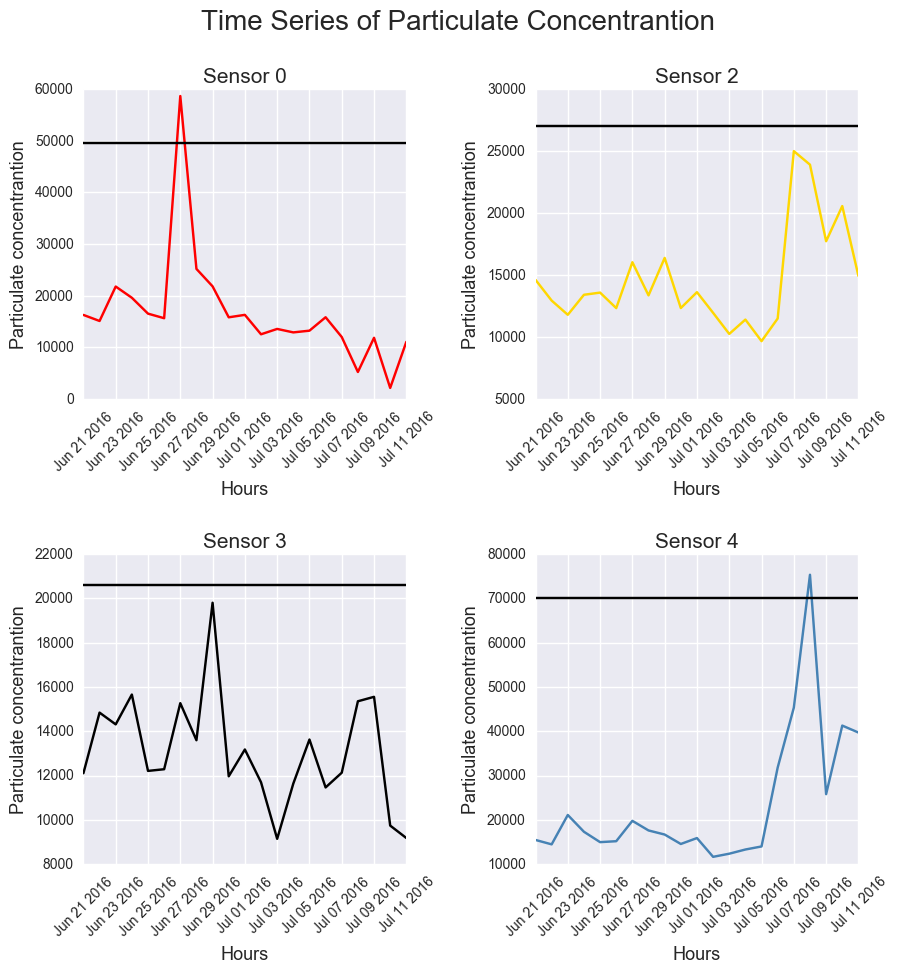

In [27]:
fs = 15

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))

ax = axes[0,0]


ax.plot(sensor_con_date0.con, color="Red", label ='sensor 0')
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds0[0], thresholds0[0]], color='k')


ax.set_xlabel("Hours", fontsize=fs-2)
ax.set_ylabel("Particulate concentrantion", fontsize=fs-2)
ax.set_title('Sensor 0', fontsize=fs)

ax = axes[0,1]
ax.plot(sensor_con_date2.con, color="Gold", label ='sensor 2')

ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds2[0], thresholds2[0]], color='k')
ax.set_xlabel("Hours", fontsize=fs-2)
ax.set_ylabel("Particulate concentrantion", fontsize=fs-2)
ax.set_title('Sensor 2', fontsize=fs)


ax = axes[1,0]
ax.plot(sensor_con_date3.con, color="Black", label ='sensor 3')

ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds3[0], thresholds3[0]], color='k')
ax.set_xlabel("Hours", fontsize=fs-2)
ax.set_ylabel("Particulate concentrantion", fontsize=fs-2)
ax.set_title('Sensor 3', fontsize=fs)

ax = axes[1,1]
ax.plot(sensor_con_date4.con, color="SteelBlue", label ='sensor 4')

ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds4[0], thresholds4[0]], color='k')
ax.set_xlabel("Hours", fontsize=fs-2)
ax.set_ylabel("Particulate concentrantion", fontsize=fs-2)
ax.set_title('Sensor 4', fontsize=fs)


fig.suptitle('Time Series of Particulate Concentrantion', fontsize=fs+5)
fig.subplots_adjust(wspace = 0.4 , hspace = 0.5)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

plt.show()

In [28]:
print (sensor_con_date0.loc[(sensor_con_date0.con > thresholds0[0])])
print (sensor_con_date4.loc[(sensor_con_date4.con > thresholds4[0])])

                   con
date                  
2016-06-27  58672.1975
                    con
date                   
2016-07-08  75349.12625


In [29]:
# Threeshold for noise level

In [30]:
thresholds0 = [sensor_spl_date0['spl'].mean() + 3 * sensor_spl_date0['spl'].std(), 
              sensor_spl_date0['spl'].mean() - 3 * sensor_spl_date0['spl'].std()]

thresholds2 = [sensor_spl_date2['spl'].mean() + 3 * sensor_spl_date2['spl'].std(), 
              sensor_spl_date2['spl'].mean() - 3 * sensor_spl_date2['spl'].std()]

thresholds3 = [sensor_spl_date3['spl'].mean() + 3 * sensor_spl_date3['spl'].std(), 
              sensor_spl_date3['spl'].mean() - 3 * sensor_spl_date3['spl'].std()]

thresholds4 = [sensor_spl_date4['spl'].mean() + 3 * sensor_spl_date4['spl'].std(), 
              sensor_spl_date4['spl'].mean() - 3 * sensor_spl_date4['spl'].std()]

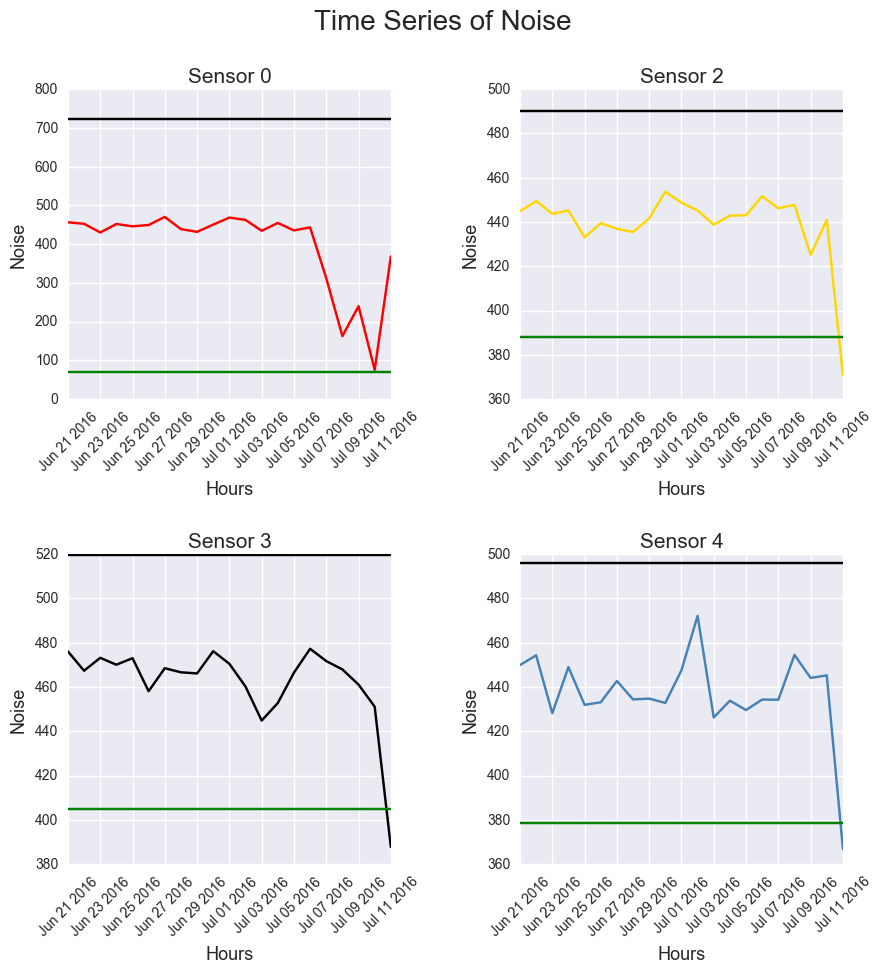

In [31]:
fs = 15

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))

ax = axes[0,0]

ax.plot(sensor_spl_date0.spl, color="Red", label ='sensor 0')
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds0[0], thresholds0[0]], color='k', label = 'uppper thresold')
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds0[1], thresholds0[1]], color='green', label = 'lower thresold')

ax.set_xlabel("Hours", fontsize=fs-2)
ax.set_ylabel("Noise", fontsize=fs-2)
ax.set_title('Sensor 0', fontsize=fs)

ax = axes[0,1]
ax.plot(sensor_spl_date2.spl, color="Gold", label ='sensor 2')
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds2[0], thresholds2[0]], color='k')
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds2[1], thresholds2[1]], color='green', label = 'lower thresold')

ax.set_xlabel("Hours", fontsize=fs-2)
ax.set_ylabel("Noise", fontsize=fs-2)
ax.set_title('Sensor 2', fontsize=fs)


ax = axes[1,0]
ax.plot(sensor_spl_date3.spl, color="Black", label ='sensor 3')

ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds3[0], thresholds3[0]], color='k')
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds3[1], thresholds3[1]], color='green', label = 'lower thresold')

ax.set_xlabel("Hours", fontsize=fs-2)
ax.set_ylabel("Noise", fontsize=fs-2)
ax.set_title('Sensor 3', fontsize=fs)

ax = axes[1,1]

ax.plot(sensor_spl_date4.spl, color="SteelBlue", label ='sensor 4')
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds4[0], thresholds4[0]], color='k')
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds4[1], thresholds4[1]], color='green', label = 'lower thresold')

ax.set_xlabel("Hours", fontsize=fs-2)
ax.set_ylabel("Noise", fontsize=fs-2)
ax.set_title('Sensor 4', fontsize=fs)


fig.suptitle('Time Series of Noise', fontsize=fs+5)
fig.subplots_adjust(wspace = 0.4 , hspace = 0.5)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

plt.show()

In [32]:
print (sensor_spl_date2.loc[(sensor_spl_date2.spl < thresholds2[1])])
print ('\n')
print (sensor_spl_date3.loc[(sensor_spl_date3.spl < thresholds3[1])])
print ('\n')
print (sensor_spl_date4.loc[(sensor_spl_date4.spl < thresholds4[1])])

                   spl
date                  
2016-07-11  370.694571


                   spl
date                  
2016-07-11  387.773885


                   spl
date                  
2016-07-11  366.916708
